# Barbed wires detection using Canny contours

### Projet 5BIM L.Matsuda, D.Mikec, R.Thiebaut

Import libraries

In [7]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

## 1. Canny contours

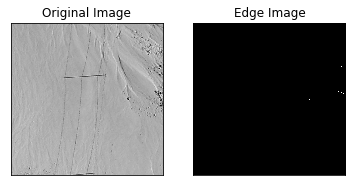

In [3]:
img = cv2.imread('imagettes/253_22.png',0)
edges = cv2.Canny(img,400,600)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In carcass detection we used [400, 600] for thresholds. It is however too strict to detect barbed wires.

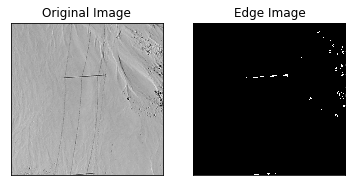

In [4]:
edges = cv2.Canny(img,200,400)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In the end, we used [200, 400]. Lots of unwanted features will then be detected so we need to do a filtering afterwards.

## 2. Hough Transform

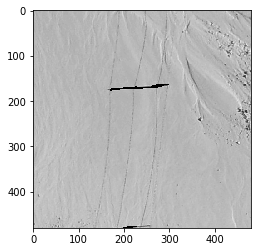

In [5]:
lines = cv2.HoughLinesP(edges,1,np.pi/180,10,minLineLength=20,maxLineGap=2)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    
plt.imshow(img,cmap = 'gray')

With HoughLinesP we can detect lines. With the Hough Transform we can locate aligned points from a binary image (in this case we use the contours).

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html

In this map, wires were oriented in the same way so we only looked for horizontal lines.

In [8]:
#method used

def lignes2(path):
    dico = {}
    files = os.listdir(path)
    for file in files:
        img = cv2.imread(path + file,0)
        edges = cv2.Canny(img,200,400)
        
        lines = cv2.HoughLinesP(edges,1,np.pi/180,10,minLineLength=30,maxLineGap=2) #hough lines
        
        dico[file] = 0
        
        if lines is not None:
            for line in lines:
                x1,y1,x2,y2 = line[0] #coordinates start and end of line
                if abs(y1-y2)<10: # we are looking for horizontal lines 
                    dico[file] = 1 # if a line is detecte we assign 1
                    break
        
    return dico

For HoughLinesP, we used minLineLength=30, maxLineGap=2, so that lines have to quite long and points have to very close to each other to be considered as aligned.

To only detect horizontal lines, we looked for lines with a difference below 10px in y value. This could be done with filtering theta value also I think.
Also it needs to be changed according to the dataset.

In [13]:
dico2 = lignes2('imagettes/')
#takes about 5min to run on my laptop

In [14]:
list(dico2.values()).count(0)

13650

In [15]:
#To show results for one image
def showlines(path,file):
    bgr = cv2.imread(path + file)
    img = cv2.imread(path + file,0)
    edges = cv2.Canny(img,200,400)

    lines = cv2.HoughLinesP(edges,1,np.pi/180,10,minLineLength=30,maxLineGap=2)

    if lines is not None:
        temp = np.zeros([480,480])
        if lines is not None:
            for line in lines:
                x1,y1,x2,y2 = line[0]
                if abs(y1-y2)<10:
                    cv2.line(temp,(x1,y1),(x2,y2),(255,255,255),2)
                    
        plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
        plt.title('Original Image'), plt.xticks([]), plt.yticks([])
        plt.show()
        plt.imshow(edges,cmap = 'gray')
        plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
        plt.show()
        plt.imshow(temp,cmap = 'gray')
        plt.title('Lines detected'), plt.xticks([]), plt.yticks([])
        
        plt.show()
        
        


### Example of false positive

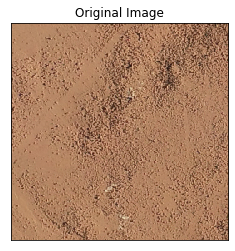

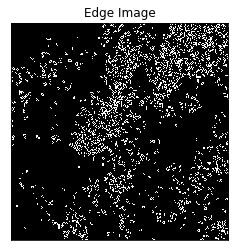

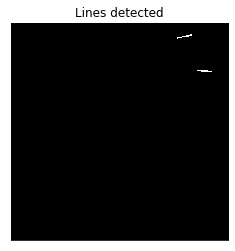

In [20]:
showlines('imagettes/', '184_19.png')

## 3. Results

In [15]:
#detected images
box =[]
for i in dico2.keys():
    if dico2[i] != 0:
        box.append(i)

In [17]:
with open("barbs2.txt", "w") as output:
    output.write(str(box))

In [25]:
text_file = open("barbs2.txt", "r")
lines = text_file.read().split(' ')

barbs = os.listdir("../Selection_imagettes/Barrière/")

In [29]:
len(barbs)

871

In [30]:
len(lines)

893

In [28]:
len(set(lines) & set(barbs))

604

We detect 893 images. 604 are True positives.

False Positives = 893 - 604 = 289

False Negatives = 871 - 604 = 267

True Negatives = 14543-893-267 = 13383

In [34]:
#Sensitivity = TP/(TP+FN)
604/(604+267)

0.6934557979334098

In [33]:
#Specificity = TN/(TN+FP)
13383/(13383+289)

0.9788619075482738

## Appendix : Other experiments

Changing contrast is not very effective

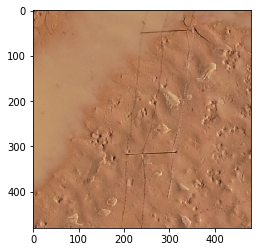

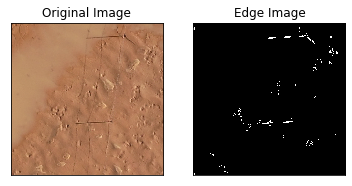

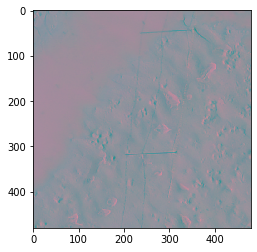

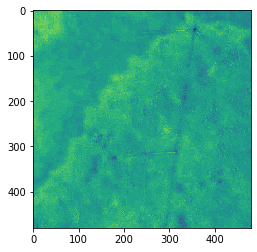

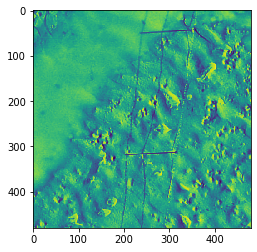

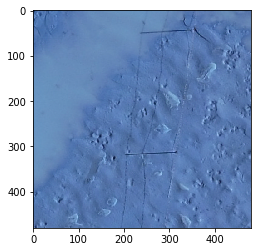

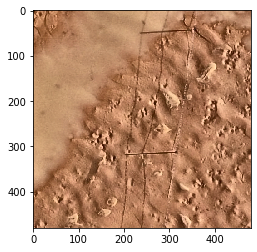

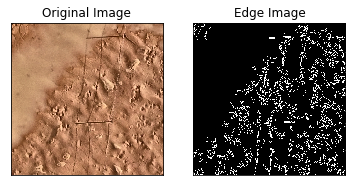

In [13]:
#-----Reading the image-----------------------------------------------------
img = cv2.imread('140416166_512751939699728_3250832040070969052_n.png', 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
plt.show()

edges = cv2.Canny(img,100,400)
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
plt.imshow(lab)
plt.show()
#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
plt.imshow(l)
plt.imshow(a)
plt.imshow(b)
plt.show()
#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
plt.imshow( cl)
plt.show()

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
plt.imshow( img)
plt.show()
#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
plt.imshow( cv2.cvtColor(final, cv2.COLOR_BGR2RGB))
plt.show()

edges = cv2.Canny(final,100,400)
plt.subplot(121),plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB),cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [16]:
img = cv2.imread('140416166_512751939699728_3250832040070969052_n.png',0)
image_enhanced = cv2.equalizeHist(img)

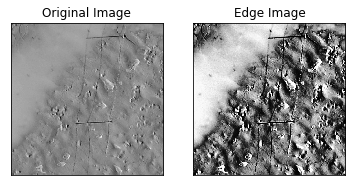

In [18]:
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_enhanced,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

I also tried to only detect edges on dark pixels but not effective as well.

In [275]:
def lignes(path):
    dico = {}
    files = os.listdir(path)
    for file in files[1:20]:
        img = cv2.imread(path + file,0)
        #img = cv2.bilateralFilter(img,15,30,30) 
        
        edges = cv2.Canny(img,100,400)
        
        
        plt.subplot(121),plt.imshow(img,cmap = 'gray')
        plt.title('Original Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(edges,cmap = 'gray')
        plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

        plt.show()
        
        lines = cv2.HoughLinesP(edges,1,np.pi/180,10,minLineLength=30,maxLineGap=2)
        temp = np.zeros([480,480])
        if lines is not None:
            darkpx=img<110
            for line in lines:
                x1,y1,x2,y2 = line[0]
                if abs(y1-y2)<10:
                    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
                    cv2.line(temp,(x1,y1),(x2,y2),(255,255,255),5)
                    temp = darkpx * temp
                    dico[file] = len(lines)
    
        plt.subplot(121),plt.imshow(img,cmap = 'gray')
        plt.title('Original Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(temp,cmap = 'gray')
        plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
        
        plt.show()
        
    return dico